GPU device name is: /device:GPU:0

170498071/170498071 [==============================] - 2s 0us/step
Sample image: 


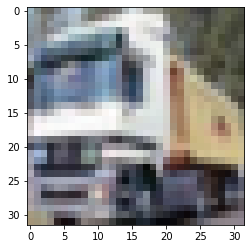

In [2]:
# implemented by kiarash geraili
# with std number: 830400048
# course: soft computing 
# instructed by Hadi veisi
# TA: Ali Rahimi

import matplotlib.pyplot as plt
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import time

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

device_name = tf.test.gpu_device_name()

print('GPU device name is: ' + device_name)

print()


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

image = x_train[1]
print('Sample image: ')
plt.imshow(image)

In [3]:
#using float 32 to make calculation easier
#dividing to 255 to normalizing data to (0,1)
x_train = x_train.astype('float16') / 255.
y_train = y_train.astype('float16')
x_test = x_test.astype('float16') / 255.
y_test = y_test.astype('float16') 

print('Input size is: ' + str(x_train.shape))
print('output size is: ' + str(y_train.shape))

print()

print('output would be like: ')

y_train

Input size is: (50000, 32, 32, 3)
output size is: (50000, 1)

output would be like: 


array([[6.],
       [9.],
       [9.],
       ...,
       [9.],
       [1.],
       [1.]], dtype=float16)

In [4]:
class CNN_Model(Model):

  def __init__(self, x_train, y_train,
               activation_function = 'sigmoid',
               kernel1_size = (3, 3),
               kernel2_size = (3, 3),
               conv_layer_size = 2,
               one_layer = False,
               normalization = False):
    
    super(CNN_Model, self).__init__()
    #initializing values
    self.x_train = x_train
    self.y_train = y_train
    self.activation_function = activation_function  
    self.kernel1_size = kernel1_size 
    self.kernel2_size = kernel2_size 
    self.conv_layer_size = conv_layer_size
    self.one_layer = one_layer 
    self.normalization = normalization

    #building the network
    self.model = tf.keras.Sequential()

    #in case batch normalization is needed we should change first layer to a normalization layer
    if self.normalization == True:
      self.model.add(keras.layers.SyncBatchNormalization())

    #if batch normalization is not needed, creating the default model with dynamic first kernel size
    else:
      self.model.add(keras.layers.Conv2D(7, self.kernel1_size, input_shape = (32,32,3), padding="same", activation = activation_function))

    if self.one_layer == False:
      #after creating first layer there are three possibilities: 1, 2 or 3 conv layers remaining to build
      #keep in mind that we have already build the first con layer for first layer in default model 
      if self.conv_layer_size > 2:
        for i in range(self.conv_layer_size - 2):
              self.model.add(keras.layers.Conv2D(7, (3, 3), activation = activation_function))

      #here is the default model with assumption of con_layer_size == 1, second 
      if self.activation_function == 'leaky_relu':
        self.model.add(layers.LeakyReLU(alpha=0.3))
        self.model.add(keras.layers.Conv2D(9, self.kernel2_size))
      else:
        self.model.add(keras.layers.Conv2D(9, self.kernel2_size, activation = activation_function))
    elif self.one_layer == True:
          self.model.add(keras.layers.MaxPooling2D(pool_size=(5, 5)))

    self.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    self.model.add(keras.layers.Flatten())
    self.model.add(keras.layers.Dropout(0.3))
    self.model.add(keras.layers.Dense(10, activation="softmax"))

################################################################################  
  def comp(self, optimizer = 'adam', loss_s = 'sparse_categorical_crossentropy', learn_rate = 0.01):
    # training the model
    if optimizer == 'sgd':
      self.model.compile(loss = loss_s,
                         optimizer = keras.optimizers.SGD(learning_rate = learn_rate),
                         metrics =['accuracy'])
    else:
      self.model.compile(loss = loss_s,
      optimizer = keras.optimizers.Adam(lr = learn_rate),
      metrics =['accuracy'])

################################################################################      
  def fit(self, batch_s = 32, Epoch = 50, validation_perc = 0.15):

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 3)

    self.tic = time.time()

    self.history = self.model.fit(self.x_train, self.y_train,
    batch_size = batch_s,
    validation_split = validation_perc,
    epochs = Epoch,
    callbacks=[callback],
    shuffle = True)

    self.toc = time.time()

################################################################################
  def output(self, model):
    plt.plot(self.history.history["loss"], label="Train_Loss for model:" + model)
    plt.plot(self.history.history["val_loss"], label="Valid_Loss for model:" + model)
    plt.legend()

    print()

    print('this model takes: '+ str(round(self.toc - self.tic, 4)) +' time')


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1329/1329 [==============================] - 14s 4ms/step - loss: 2.2544 - accuracy: 0.1562 - val_loss: 2.0456 - val_accuracy: 0.2731
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.7933 - accuracy: 0.3645 - val_loss: 1.6133 - val_accuracy: 0.4208
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.5087 - accuracy: 0.4651 - val_loss: 1.4608 - val_accuracy: 0.4823
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.3795 - accuracy: 0.5096 - val_loss: 1.2727 - val_accuracy: 0.5509
Epoch 5/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.2918 - accuracy: 0.5450 - val_loss: 1.2434 - val_accuracy: 0.5631
Epoch 6/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.2520 - accuracy: 0.5612 - val_loss: 1.2592 - val_accuracy: 0.5624
Epoch 7/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.2186 - accuracy: 0.5723 - val_loss: 1.1989 - val_accuracy

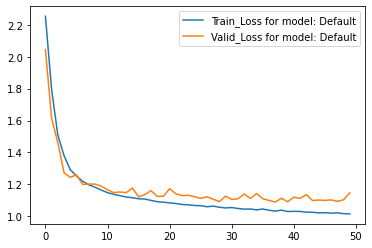

In [4]:
#model with default parameters

d_model = CNN_Model(x_train, y_train)
d_model.comp()
d_model.fit()
d_model.output(' Default')

Epoch 1/50
1329/1329 [==============================] - 6s 5ms/step - loss: 2.3123 - accuracy: 0.0992 - val_loss: 2.3043 - val_accuracy: 0.0972
Epoch 2/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.2810 - accuracy: 0.1207 - val_loss: 2.0423 - val_accuracy: 0.2859
Epoch 3/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.7967 - accuracy: 0.3565 - val_loss: 1.7000 - val_accuracy: 0.3903
Epoch 4/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.5522 - accuracy: 0.4426 - val_loss: 1.4374 - val_accuracy: 0.4867
Epoch 5/50
1329/1329 [==============================] - 6s 5ms/step - loss: 1.3878 - accuracy: 0.5012 - val_loss: 1.3494 - val_accuracy: 0.5192
Epoch 6/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.3042 - accuracy: 0.5377 - val_loss: 1.2582 - val_accuracy: 0.5513
Epoch 7/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.2593 - accuracy: 0.5546 - val_loss: 1.2439 - val_accuracy:

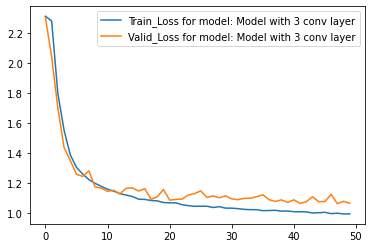

In [ ]:
three_layer_model = CNN_Model(x_train, y_train, conv_layer_size = 3)
three_layer_model.comp()
three_layer_model.fit()
three_layer_model.output(' Model with 3 conv layer')

Epoch 1/50
1329/1329 [==============================] - 7s 5ms/step - loss: 2.3134 - accuracy: 0.1014 - val_loss: 2.3051 - val_accuracy: 0.0972
Epoch 2/50
1329/1329 [==============================] - 6s 5ms/step - loss: 2.3040 - accuracy: 0.0976 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/50
1329/1329 [==============================] - 6s 5ms/step - loss: 2.3040 - accuracy: 0.0996 - val_loss: 2.3035 - val_accuracy: 0.0999
Epoch 4/50
1329/1329 [==============================] - 6s 5ms/step - loss: 2.3041 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.0975
Epoch 5/50
1329/1329 [==============================] - 6s 5ms/step - loss: 2.3039 - accuracy: 0.0995 - val_loss: 2.3049 - val_accuracy: 0.0984
Epoch 6/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.3042 - accuracy: 0.0984 - val_loss: 2.3051 - val_accuracy: 0.0975
Epoch 7/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3035 - val_accuracy:

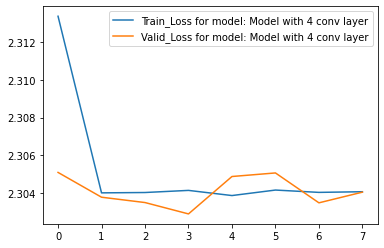

In [ ]:
four_layer_model = CNN_Model(x_train, y_train, conv_layer_size = 4)
four_layer_model.comp()
four_layer_model.fit()
four_layer_model.output(' Model with 4 conv layer')

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.3085 - accuracy: 0.0988 - val_loss: 2.3031 - val_accuracy: 0.0999
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.3038 - accuracy: 0.0995 - val_loss: 2.3037 - val_accuracy: 0.1015
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.3035 - accuracy: 0.0993 - val_loss: 2.3048 - val_accuracy: 0.0972
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.3040 - accuracy: 0.1019 - val_loss: 2.3035 - val_accuracy: 0.0984
Epoch 5/50
1329/1329 [==============================] - 6s 5ms/step - loss: 2.3040 - accuracy: 0.1008 - val_loss: 2.3030 - val_accuracy: 0.1029
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.3040 - accuracy: 0.0986 - val_loss: 2.3031 - val_accuracy: 0.0953

this model takes: 34.2205 time


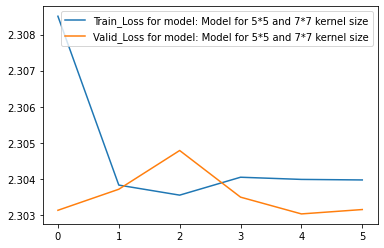

In [ ]:
kernel_model = CNN_Model(x_train, y_train, kernel1_size = (5, 5), kernel2_size = (7, 7))
kernel_model.comp()
kernel_model.fit()
kernel_model.output(' Model for 5*5 and 7*7 kernel size')

Epoch 1/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.9578 - accuracy: 0.2828 - val_loss: 1.7580 - val_accuracy: 0.3728
Epoch 2/50
1329/1329 [==============================] - 5s 3ms/step - loss: 1.7918 - accuracy: 0.3557 - val_loss: 1.6581 - val_accuracy: 0.4216
Epoch 3/50
1329/1329 [==============================] - 5s 3ms/step - loss: 1.7489 - accuracy: 0.3706 - val_loss: 1.6447 - val_accuracy: 0.4104
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.7296 - accuracy: 0.3837 - val_loss: 1.5920 - val_accuracy: 0.4401
Epoch 5/50
1329/1329 [==============================] - 5s 3ms/step - loss: 1.7206 - accuracy: 0.3859 - val_loss: 1.5984 - val_accuracy: 0.4392
Epoch 6/50
1329/1329 [==============================] - 5s 3ms/step - loss: 1.7080 - accuracy: 0.3895 - val_loss: 1.6124 - val_accuracy: 0.4321
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.7040 - accuracy: 0.3912 - val_loss: 1.5889 - val_accuracy:

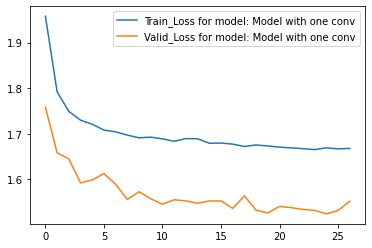

In [ ]:
one_conv_model = CNN_Model(x_train, y_train, one_layer = True)
one_conv_model.comp()
one_conv_model.fit()
one_conv_model.output(' Model with one conv')

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.4096 - accuracy: 0.0981 - val_loss: 2.3112 - val_accuracy: 0.1065
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.3156 - accuracy: 0.0993 - val_loss: 2.3228 - val_accuracy: 0.1065
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.3159 - accuracy: 0.0975 - val_loss: 2.3054 - val_accuracy: 0.1015
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.3158 - accuracy: 0.0989 - val_loss: 2.3171 - val_accuracy: 0.0999
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.3165 - accuracy: 0.0983 - val_loss: 2.3153 - val_accuracy: 0.1000

this model takes: 27.4661 time


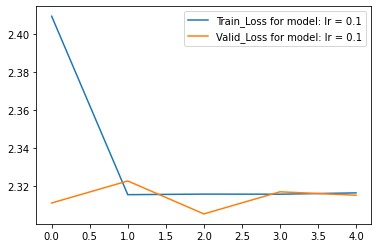

In [ ]:
first_lr_model = CNN_Model(x_train, y_train)
first_lr_model.comp(learn_rate = 0.1)
first_lr_model.fit()
first_lr_model.output(' lr = 0.1')

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.1577 - accuracy: 0.2106 - val_loss: 1.9457 - val_accuracy: 0.3125
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8960 - accuracy: 0.3308 - val_loss: 1.8317 - val_accuracy: 0.3656
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8252 - accuracy: 0.3624 - val_loss: 1.7930 - val_accuracy: 0.3752
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.7570 - accuracy: 0.3826 - val_loss: 1.7065 - val_accuracy: 0.3987
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.6557 - accuracy: 0.4136 - val_loss: 1.5738 - val_accuracy: 0.4417
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.5495 - accuracy: 0.4498 - val_loss: 1.4825 - val_accuracy: 0.4771
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4698 - accuracy: 0.4813 - val_loss: 1.4482 - val_accuracy:

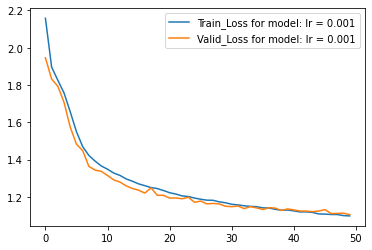

In [ ]:
second_lr_model = CNN_Model(x_train, y_train)
second_lr_model.comp(learn_rate = 0.001)
second_lr_model.fit()
second_lr_model.output(' lr = 0.001')

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.3510 - accuracy: 0.1004 - val_loss: 2.2910 - val_accuracy: 0.1336
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.2629 - accuracy: 0.1545 - val_loss: 2.1835 - val_accuracy: 0.2343
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.1231 - accuracy: 0.2324 - val_loss: 2.0498 - val_accuracy: 0.2711
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.0488 - accuracy: 0.2678 - val_loss: 2.0025 - val_accuracy: 0.2975
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.0115 - accuracy: 0.2814 - val_loss: 1.9738 - val_accuracy: 0.3119
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.9786 - accuracy: 0.2980 - val_loss: 1.9438 - val_accuracy: 0.3269
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.9479 - accuracy: 0.3088 - val_loss: 1.9175 - val_accuracy:

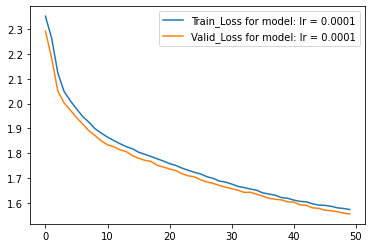

In [ ]:
third_lr_model = CNN_Model(x_train, y_train)
third_lr_model.comp(learn_rate = 0.0001)
third_lr_model.fit()
third_lr_model.output(' lr = 0.0001')

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.6543 - accuracy: 0.4288 - val_loss: 1.6268 - val_accuracy: 0.4699
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4904 - accuracy: 0.4921 - val_loss: 1.5692 - val_accuracy: 0.4565
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4661 - accuracy: 0.5010 - val_loss: 1.3603 - val_accuracy: 0.5323
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4713 - accuracy: 0.5018 - val_loss: 1.5739 - val_accuracy: 0.4791
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4680 - accuracy: 0.5030 - val_loss: 1.4730 - val_accuracy: 0.4853
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4557 - accuracy: 0.5062 - val_loss: 1.4525 - val_accuracy: 0.5259
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4476 - accuracy: 0.5120 - val_loss: 1.6736 - val_accuracy:

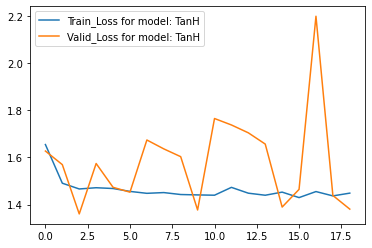

In [ ]:
first_activation_model = CNN_Model(x_train, y_train, activation_function = 'tanh')
first_activation_model.comp()
first_activation_model.fit()
first_activation_model.output(' TanH')

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.7038 - accuracy: 0.3938 - val_loss: 1.6634 - val_accuracy: 0.4224
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.5423 - accuracy: 0.4640 - val_loss: 1.4012 - val_accuracy: 0.5172
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4799 - accuracy: 0.4946 - val_loss: 1.6352 - val_accuracy: 0.4832
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4496 - accuracy: 0.5036 - val_loss: 1.4647 - val_accuracy: 0.4908
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4111 - accuracy: 0.5163 - val_loss: 1.4841 - val_accuracy: 0.4888
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.3978 - accuracy: 0.5213 - val_loss: 1.4246 - val_accuracy: 0.5184
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.3674 - accuracy: 0.5321 - val_loss: 1.4155 - val_accuracy:

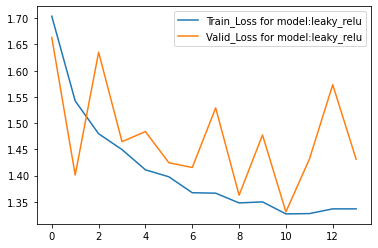

In [ ]:
second_activation_model = CNN_Model(x_train, y_train, activation_function = 'leaky_relu')
second_activation_model.comp()
second_activation_model.fit()
second_activation_model.output('leaky_relu')

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.3598 - accuracy: 0.1038 - val_loss: 2.3074 - val_accuracy: 0.0953
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.2956 - accuracy: 0.1212 - val_loss: 2.2612 - val_accuracy: 0.1675
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.1984 - accuracy: 0.1960 - val_loss: 2.1018 - val_accuracy: 0.2409
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.0743 - accuracy: 0.2564 - val_loss: 2.0175 - val_accuracy: 0.2844
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.0141 - accuracy: 0.2842 - val_loss: 1.9801 - val_accuracy: 0.3043
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.9715 - accuracy: 0.3028 - val_loss: 1.9462 - val_accuracy: 0.3085
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.9365 - accuracy: 0.3193 - val_loss: 1.9190 - val_accuracy:

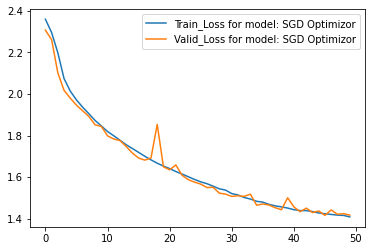

In [ ]:
first_optimizor_model = CNN_Model(x_train, y_train)
first_optimizor_model.comp(optimizer = 'sgd')
first_optimizor_model.fit()
first_optimizor_model.output(' SGD Optimizor')

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.9514 - accuracy: 0.3680 - val_loss: 1.5592 - val_accuracy: 0.4456
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.5691 - accuracy: 0.4502 - val_loss: 1.4891 - val_accuracy: 0.4836
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.5204 - accuracy: 0.4677 - val_loss: 1.4723 - val_accuracy: 0.4924
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.5018 - accuracy: 0.4796 - val_loss: 1.4474 - val_accuracy: 0.5001
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4946 - accuracy: 0.4868 - val_loss: 1.4521 - val_accuracy: 0.5044
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4723 - accuracy: 0.4939 - val_loss: 1.4984 - val_accuracy: 0.4893
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4592 - accuracy: 0.4987 - val_loss: 1.4640 - val_accuracy:

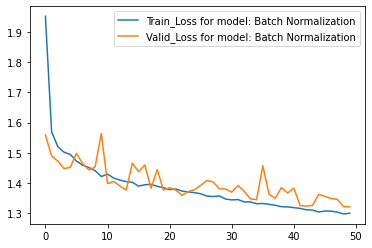

In [ ]:
normalization_model = CNN_Model(x_train, y_train, normalization = True)
normalization_model.comp()
normalization_model.fit()
normalization_model.output(' Batch Normalization')

Epoch 1/50
10625/10625 [==============================] - 34s 3ms/step - loss: 1.9487 - accuracy: 0.2958 - val_loss: 1.6409 - val_accuracy: 0.4093
Epoch 2/50
10625/10625 [==============================] - 33s 3ms/step - loss: 1.5393 - accuracy: 0.4587 - val_loss: 1.5196 - val_accuracy: 0.4481
Epoch 3/50
10625/10625 [==============================] - 32s 3ms/step - loss: 1.3749 - accuracy: 0.5188 - val_loss: 1.3025 - val_accuracy: 0.5413
Epoch 4/50
10625/10625 [==============================] - 31s 3ms/step - loss: 1.2929 - accuracy: 0.5494 - val_loss: 1.2442 - val_accuracy: 0.5681
Epoch 5/50
10625/10625 [==============================] - 34s 3ms/step - loss: 1.2520 - accuracy: 0.5634 - val_loss: 1.2485 - val_accuracy: 0.5719
Epoch 6/50
10625/10625 [==============================] - 32s 3ms/step - loss: 1.2248 - accuracy: 0.5747 - val_loss: 1.2567 - val_accuracy: 0.5585
Epoch 7/50
10625/10625 [==============================] - 34s 3ms/step - loss: 1.2092 - accuracy: 0.5804 - val_loss: 1

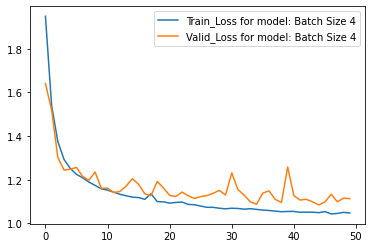

In [ ]:
batch4_model = CNN_Model(x_train, y_train)
batch4_model.comp()
batch4_model.fit(batch_s = 4)
batch4_model.output(' Batch Size 4')

Epoch 1/50
333/333 [==============================] - 3s 6ms/step - loss: 2.4047 - accuracy: 0.1007 - val_loss: 2.3032 - val_accuracy: 0.0959
Epoch 2/50
333/333 [==============================] - 2s 5ms/step - loss: 2.3024 - accuracy: 0.1042 - val_loss: 2.3005 - val_accuracy: 0.1365
Epoch 3/50
333/333 [==============================] - 2s 5ms/step - loss: 2.2062 - accuracy: 0.1818 - val_loss: 2.0530 - val_accuracy: 0.2732
Epoch 4/50
333/333 [==============================] - 2s 5ms/step - loss: 1.9152 - accuracy: 0.3241 - val_loss: 1.7800 - val_accuracy: 0.3465
Epoch 5/50
333/333 [==============================] - 2s 5ms/step - loss: 1.7155 - accuracy: 0.3882 - val_loss: 1.6766 - val_accuracy: 0.3816
Epoch 6/50
333/333 [==============================] - 2s 5ms/step - loss: 1.5909 - accuracy: 0.4308 - val_loss: 1.5590 - val_accuracy: 0.4379
Epoch 7/50
333/333 [==============================] - 2s 6ms/step - loss: 1.4987 - accuracy: 0.4653 - val_loss: 1.4686 - val_accuracy: 0.4685
Epoch 

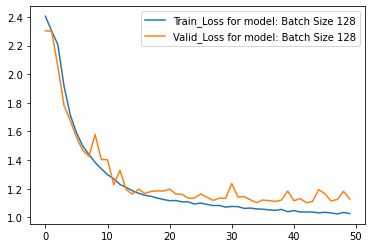

In [ ]:
batch128_model = CNN_Model(x_train, y_train)
batch128_model.comp()
batch128_model.fit(batch_s = 128)
batch128_model.output(' Batch Size 128')

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.3217 - accuracy: 0.0979 - val_loss: 2.3030 - val_accuracy: 0.0953
Epoch 2/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.3038 - accuracy: 0.1001 - val_loss: 2.3034 - val_accuracy: 0.0984
Epoch 3/50
1329/1329 [==============================] - 6s 4ms/step - loss: 2.3040 - accuracy: 0.0986 - val_loss: 2.3034 - val_accuracy: 0.1008
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.3039 - accuracy: 0.0995 - val_loss: 2.3051 - val_accuracy: 0.0953
Epoch 5/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.9801 - accuracy: 0.2800 - val_loss: 1.6522 - val_accuracy: 0.4012
Epoch 6/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.6012 - accuracy: 0.4240 - val_loss: 1.5034 - val_accuracy: 0.4652
Epoch 7/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.4594 - accuracy: 0.4750 - val_loss: 1.3893 - val_accuracy:

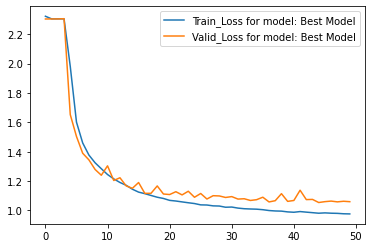

In [43]:
b_model = CNN_Model(x_train, y_train, conv_layer_size = 3)
b_model.comp()
b_model.fit()
b_model.output(' Best Model')

# ***Filters and Kernel***

In [44]:
b_model.model.summary()

filters, biases = b_model.model.layers[1].get_weights()

print()

#we expect to see 7 filters with 3*3*3 kernel size

filters.shape

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 7)         196       
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 7)         448       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 9)         576       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 9)        0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1764)              0         
                                                                 
 dropout_12 (Dropout)        (None, 1764)              0         
                                                     

(3, 3, 7, 7)

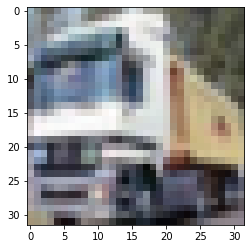

In [45]:
plt.imshow(image)

<function matplotlib.pyplot.show(*args, **kw)>

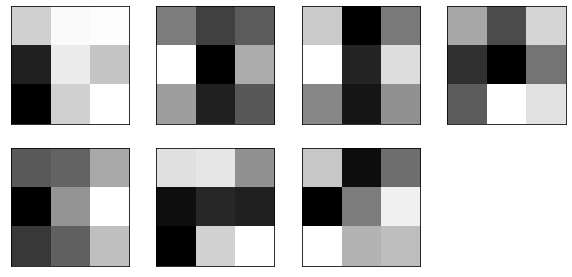

In [46]:
fig = plt.figure(figsize = (10,10))

col = 4
row = 4

n_filters = 7

for i in range(1, n_filters + 1):
  f = filters[:,:,:,i-1]
  fig = plt.subplot(row,col,i)
  fig.set_xticks([])
  fig.set_yticks([])
  plt.imshow(f[:,:,0], cmap = 'gray')
plt.show

1/1 [==============================] - 0s 43ms/step


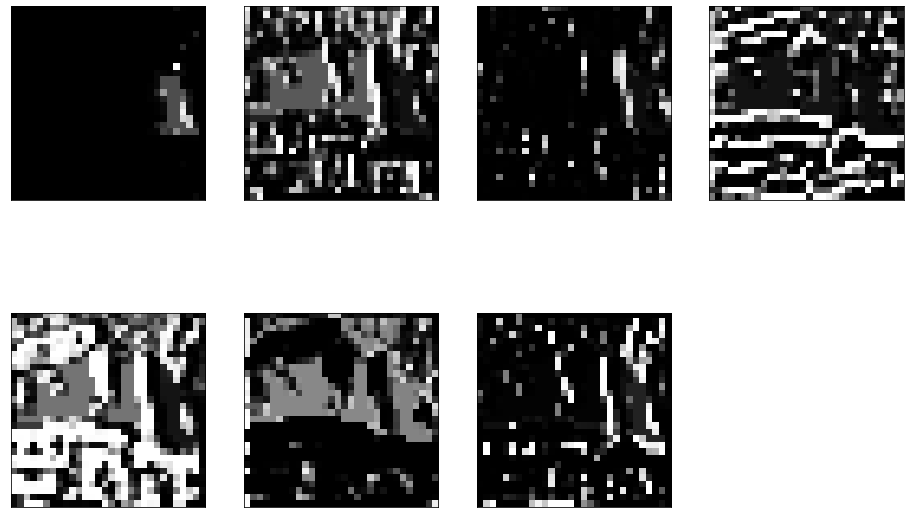

In [47]:
out = [b_model.model.layers[1].output]

first_layer_model = Model(inputs = b_model.model.inputs, outputs = out)

im = np.expand_dims(image, axis = 0)

predicted_image = first_layer_model.predict(im)

col = 4
row = 3

for j in predicted_image:
  fig = plt.figure(figsize = (16,16))
  for i in range(1, n_filters + 1):

    fig = plt.subplot(row,col,i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(j[:,:,i-1], cmap = 'gray')
  plt.show

# ***MobileNetV2***

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
1329/1329 [==============================] - 34s 22ms/step - loss: 3.2668 - accuracy: 0.1009 - val_loss: 2.3034 - val_accuracy: 0.1121
Epoch 2/20
1329/1329 [==============================] - 25s 19ms/step - loss: 2.9262 - accuracy: 0.1047 - val_loss: 21.3143 - val_accuracy: 0.0851
Epoch 3/20
1329/1329 [==============================] - 28s 21ms/step - loss: 2.7059 - accuracy: 0.1019 - val_loss: 2.8404 - val_accuracy: 0.1069
Epoch 4/20
1329/1329 [==============================] - 26s 20ms/step - loss: 2.5691 - accuracy: 0.1108 - val_loss: 2.8168 - val_accuracy: 0.1287
Epoch 5/20
1329/1329 [==============================] - 25s 19ms/step - loss: 2.1551 - accuracy: 0.1838 - val_loss: 2.2288 - val_accuracy: 0.1911
Epoch 6/20
1329/1329 [==============================] - 27s 20ms/step - loss: 1.9721 - accuracy: 0.2338 - val_loss: 3.2960 - val_accuracy: 0.2263
Epoch 7/20
1329/1329 [==============================] - 25s 

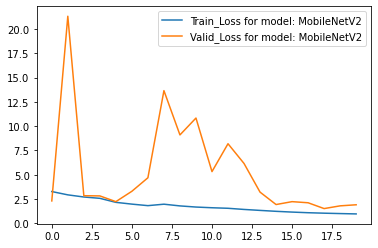

In [42]:
from tensorflow.keras.applications import MobileNetV2

pre_trained_model = MobileNetV2(weights='imagenet', include_top = False) 
flatten_layer = tf.keras.layers.Flatten()
dense_layer = tf.keras.layers.Dense(10, activation='softmax')

input_images = tf.keras.Input(shape=(32, 32, 3), name='input_image') 
features = pre_trained_model(input_images)
flatten_features = flatten_layer(features)
final_outputs = dense_layer(flatten_features)

model = tf.keras.Model(inputs = input_images, outputs = final_outputs)

model.compile(loss = 'sparse_categorical_crossentropy',
      optimizer = keras.optimizers.Adam(lr = 0.01),
      metrics =['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

tic = time.time()

history = model.fit(x_train, y_train,
                    batch_size = 32,
                    validation_split = 0.15,
                    epochs = 20,
                    callbacks=[callback],
                    shuffle = True)
toc = time.time()

plt.plot(history.history["loss"], label="Train_Loss for model:" + ' MobileNetV2')
plt.plot(history.history["val_loss"], label="Valid_Loss for model:" + ' MobileNetV2')
plt.legend()

print()

print('this model takes: '+ str(round(toc - tic, 4)) +' time')